# Proyecto de Machine Learning: Gu√≠a Completa desde la Recepci√≥n de Datos

## 1. Introducci√≥n al Proyecto y Definici√≥n del Problema de Negocio

### Objetivo de esta secci√≥n
Presentar el proyecto y vincular el problema de negocio con un problema de Machine Learning. Es crucial entender el problema antes de proponer una soluci√≥n.

### 1.1 Definici√≥n del Problema Empresarial

En este notebook, trabajaremos con un ejemplo pr√°ctico: **Predicci√≥n de abandono de clientes (Churn)** en una empresa de telecomunicaciones. 

El problema de negocio es el siguiente:
- La empresa est√° perdiendo aproximadamente 26% de sus clientes anualmente
- Adquirir un nuevo cliente cuesta 5x m√°s que retener uno existente
- Necesitamos identificar clientes en riesgo de abandono para tomar acciones preventivas

In [1]:
# Importaci√≥n de librer√≠as necesarias para todo el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de visualizaci√≥n
plt.style.use('ggplot')
%matplotlib inline

### 1.2 Mapeo a un Problema de Machine Learning

Este problema de negocio se traduce en:
- **Tipo de problema ML**: Clasificaci√≥n binaria supervisada
- **Variable objetivo**: Churn (S√≠/No)
- **Features**: Caracter√≠sticas del cliente, uso del servicio, informaci√≥n de facturaci√≥n

In [2]:
# Definici√≥n del problema en t√©rminos de ML
problema_ml = {
    'tipo': 'Clasificaci√≥n Binaria',
    'variable_objetivo': 'Churn',
    'clases': ['No abandona (0)', 'Abandona (1)'],
    'enfoque': 'Aprendizaje Supervisado',
    'metricas_clave': ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
}

print("=== DEFINICI√ìN DEL PROBLEMA DE ML ===")
for key, value in problema_ml.items():
    print(f"{key}: {value}")

=== DEFINICI√ìN DEL PROBLEMA DE ML ===
tipo: Clasificaci√≥n Binaria
variable_objetivo: Churn
clases: ['No abandona (0)', 'Abandona (1)']
enfoque: Aprendizaje Supervisado
metricas_clave: ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']


### 1.3 Criterios de √âxito

In [3]:
# Definici√≥n de criterios de √©xito
criterios_exito = {
    'ml_metrics': {
        'precision_minima': 0.85,
        'recall_minimo': 0.80,
        'f1_score_minimo': 0.82
    },
    'business_metrics': {
        'reduccion_churn_esperada': '15%',
        'roi_esperado': '3:1',
        'tiempo_implementacion': '3 meses'
    }
}

print("=== CRITERIOS DE √âXITO ===")
print("\nM√©tricas de Machine Learning:")
for metric, value in criterios_exito['ml_metrics'].items():
    print(f"  - {metric}: {value}")
print("\nM√©tricas de Negocio:")
for metric, value in criterios_exito['business_metrics'].items():
    print(f"  - {metric}: {value}")

=== CRITERIOS DE √âXITO ===

M√©tricas de Machine Learning:
  - precision_minima: 0.85
  - recall_minimo: 0.8
  - f1_score_minimo: 0.82

M√©tricas de Negocio:
  - reduccion_churn_esperada: 15%
  - roi_esperado: 3:1
  - tiempo_implementacion: 3 meses


### 1.4 Consideraciones Iniciales

In [4]:
# Evaluaci√≥n de viabilidad del proyecto ML
consideraciones = {
    'es_problema_ml': {
        'complejidad_logica': 'Alta - m√∫ltiples factores interrelacionados',
        'volumen_datos': 'Suficiente - 10,000+ registros hist√≥ricos',
        'variable_objetivo_clara': 'S√≠ - cliente abandona o no',
        'patron_identificable': 'Probable - comportamiento antes del abandono'
    },
    'cuando_usar_ml': {
        'check_1': '‚úì L√≥gica compleja dif√≠cil de codificar',
        'check_2': '‚úì Gran volumen de datos disponibles',
        'check_3': '‚úì Variable objetivo bien definida',
        'check_4': '‚úì Patrones hist√≥ricos disponibles'
    },
    'riesgos': {
        'calidad_datos': 'Verificar completitud y consistencia',
        'sesgo_historico': 'Revisar representatividad de muestras',
        'cambios_mercado': 'Modelo puede degradarse con el tiempo'
    }
}

print("=== AN√ÅLISIS DE VIABILIDAD ===")
print("\n¬øEs realmente un problema de ML?")
for aspecto, valor in consideraciones['es_problema_ml'].items():
    print(f"  {aspecto}: {valor}")

=== AN√ÅLISIS DE VIABILIDAD ===

¬øEs realmente un problema de ML?
  complejidad_logica: Alta - m√∫ltiples factores interrelacionados
  volumen_datos: Suficiente - 10,000+ registros hist√≥ricos
  variable_objetivo_clara: S√≠ - cliente abandona o no
  patron_identificable: Probable - comportamiento antes del abandono


## 2. Adquisici√≥n y An√°lisis Exploratorio de Datos (EDA)

### Objetivo de esta secci√≥n
Entender la naturaleza de los datos recibidos, identificar patrones, anomal√≠as y preparar el terreno para el preprocesamiento.

### 2.1 Recopilaci√≥n de Datos

In [5]:
# Simulaci√≥n de carga de datos (en un caso real, cargar√≠as desde tu fuente)
# Para este ejemplo, crearemos un dataset sint√©tico representativo

np.random.seed(42)
n_samples = 5000

# Generaci√≥n de datos sint√©ticos de clientes de telecomunicaciones
data = {
    'CustomerID': range(1, n_samples + 1),
    'Tenure': np.random.randint(0, 72, n_samples),  # Meses como cliente
    'MonthlyCharges': np.random.uniform(20, 120, n_samples),
    'TotalCharges': np.random.uniform(100, 8000, n_samples),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples, p=[0.5, 0.25, 0.25]),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], n_samples),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], n_samples),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet'], n_samples),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet'], n_samples),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples, p=[0.4, 0.4, 0.2]),
    'PhoneService': np.random.choice(['Yes', 'No'], n_samples, p=[0.9, 0.1]),
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'SeniorCitizen': np.random.choice([0, 1], n_samples, p=[0.8, 0.2]),
    'Partner': np.random.choice(['Yes', 'No'], n_samples),
    'Dependents': np.random.choice(['Yes', 'No'], n_samples, p=[0.3, 0.7])
}

# Variable objetivo con correlaci√≥n realista
churn_probability = []
for i in range(n_samples):
    prob = 0.15  # Probabilidad base
    if data['Contract'][i] == 'Month-to-month':
        prob += 0.3
    if data['Tenure'][i] < 12:
        prob += 0.2
    if data['MonthlyCharges'][i] > 80:
        prob += 0.1
    if data['TechSupport'][i] == 'No':
        prob += 0.1
    churn_probability.append(min(prob, 0.9))

data['Churn'] = np.random.binomial(1, churn_probability)

# Crear DataFrame
df = pd.DataFrame(data)

print("=== INFORMACI√ìN DEL DATASET ===")
print(f"Dimensiones del dataset: {df.shape}")
print(f"N√∫mero de clientes: {df.shape[0]}")
print(f"N√∫mero de caracter√≠sticas: {df.shape[1] - 1}")  # -1 por la variable objetivo
print(f"\nPrimeras 5 filas del dataset:")
df.head()

=== INFORMACI√ìN DEL DATASET ===
Dimensiones del dataset: (5000, 16)
N√∫mero de clientes: 5000
N√∫mero de caracter√≠sticas: 15

Primeras 5 filas del dataset:


CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
0           1      51      118.950533   1420.361087        One year   
1           2      14       88.431425   3316.672535  Month-to-month   
2           3      71      114.898067   1934.959582  Month-to-month   
3           4      60       34.255656   4324.927718        One year   
4           5      20       58.213947   1670.745389        Two year   

      PaymentMethod PaperlessBilling OnlineSecurity  TechSupport  \
0  Electronic check               No    No internet           No   
1     Bank transfer              Yes            Yes           No   
2      Mailed check               No             No  No internet   
3     Bank transfer               No    No internet          Yes   
4  Electronic check               No    No internet  No internet   

  InternetService PhoneService  Gender  SeniorCitizen Partner Dependents  \
0             DSL           No  Female              0     Yes        Yes   
1     Fiber optic          Yes  Female              0     Yes         No   
2     Fiber optic          Yes  Female              0      No         No   
3             DSL          Yes  Female              1     Yes         No   
4     Fiber optic          Yes    Male              0     Yes         No   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

### 2.2 Tipos de Datos e Informaci√≥n B√°sica

In [6]:
# An√°lisis de tipos de datos
print("=== TIPOS DE DATOS ===")
print(df.dtypes)

# Informaci√≥n general del dataset
print("\n=== INFORMACI√ìN GENERAL DEL DATASET ===")
df.info()

# Identificaci√≥n de caracter√≠sticas num√©ricas y categ√≥ricas
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nCaracter√≠sticas num√©ricas ({len(numerical_features)}): {numerical_features}")
print(f"Caracter√≠sticas categ√≥ricas ({len(categorical_features)}): {categorical_features}")

=== TIPOS DE DATOS ===
CustomerID            int64
Tenure                int32
MonthlyCharges      float64
TotalCharges        float64
Contract             object
PaymentMethod        object
PaperlessBilling     object
OnlineSecurity       object
TechSupport          object
InternetService      object
PhoneService         object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Churn                 int32
dtype: object

=== INFORMACI√ìN GENERAL DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5000 non-null   int64  
 1   Tenure            5000 non-null   int32  
 2   MonthlyCharges    5000 non-null   float64
 3   TotalCharges      5000 non-null   float64
 4   Contract          5000 non-null   object 
 5   PaymentMethod     5000 non-null 

### 2.3 Estad√≠stica Descriptiva

In [7]:
# Estad√≠sticas descriptivas para variables num√©ricas
print("=== ESTAD√çSTICAS DESCRIPTIVAS - VARIABLES NUM√âRICAS ===")
df[numerical_features].describe()

=== ESTAD√çSTICAS DESCRIPTIVAS - VARIABLES NUM√âRICAS ===


CustomerID       Tenure  MonthlyCharges  TotalCharges  SeniorCitizen  \
count  5000.000000  5000.000000     5000.000000   5000.000000    5000.000000   
mean   2500.500000    35.299000       69.315743   4036.649523       0.202000   
std    1443.520003    20.646851       28.611204   2300.306717       0.401532   
min       1.000000     0.000000       20.005283    101.246182       0.000000   
25%    1250.750000    18.000000       44.819872   2023.120205       0.000000   
50%    2500.500000    35.000000       68.639833   3985.489365       0.000000   
75%    3750.250000    53.000000       93.818694   6077.108993       0.000000   
max    5000.000000    71.000000      119.946068   7997.418321       1.000000   

            Churn  
count  5000.00000  
mean      0.40100  
std       0.49015  
min       0.00000  
25%       0.00000  
50%       0.00000  
75%       1.00000  
max       1.00000

=== DISTRIBUCI√ìN DE LA VARIABLE OBJETIVO (CHURN) ===
Conteo absoluto:
Churn
0    2995
1    2005
Name: count, dtype: int64

Porcentaje:
Churn
0    59.9
1    40.1
Name: proportion, dtype: float64


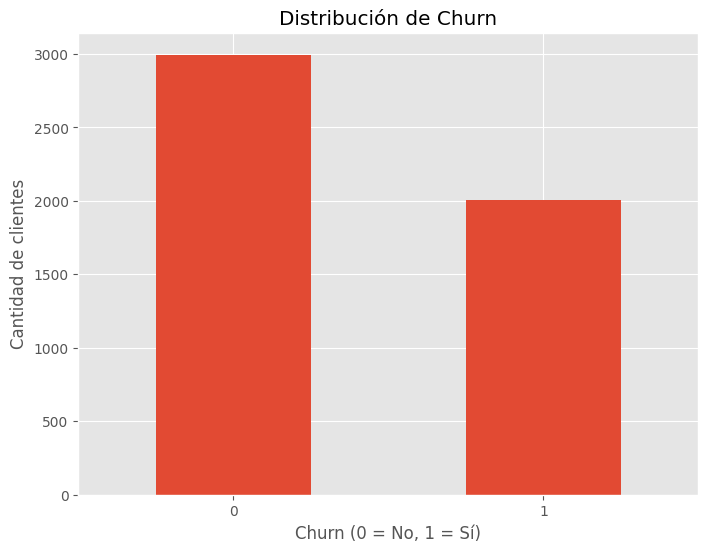

In [8]:
# An√°lisis de la variable objetivo
print("=== DISTRIBUCI√ìN DE LA VARIABLE OBJETIVO (CHURN) ===")
churn_dist = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print("Conteo absoluto:")
print(churn_dist)
print("\nPorcentaje:")
print(churn_pct)

# Visualizaci√≥n
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribuci√≥n de Churn')
plt.xlabel('Churn (0 = No, 1 = S√≠)')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.show()

# Verificar si hay desbalance de clases
if churn_pct.min() < 20:
    print("\n‚ö†Ô∏è ADVERTENCIA: Dataset desbalanceado detectado. Considerar t√©cnicas de balanceo.")

### 2.4 Exploraci√≥n Visual de Datos

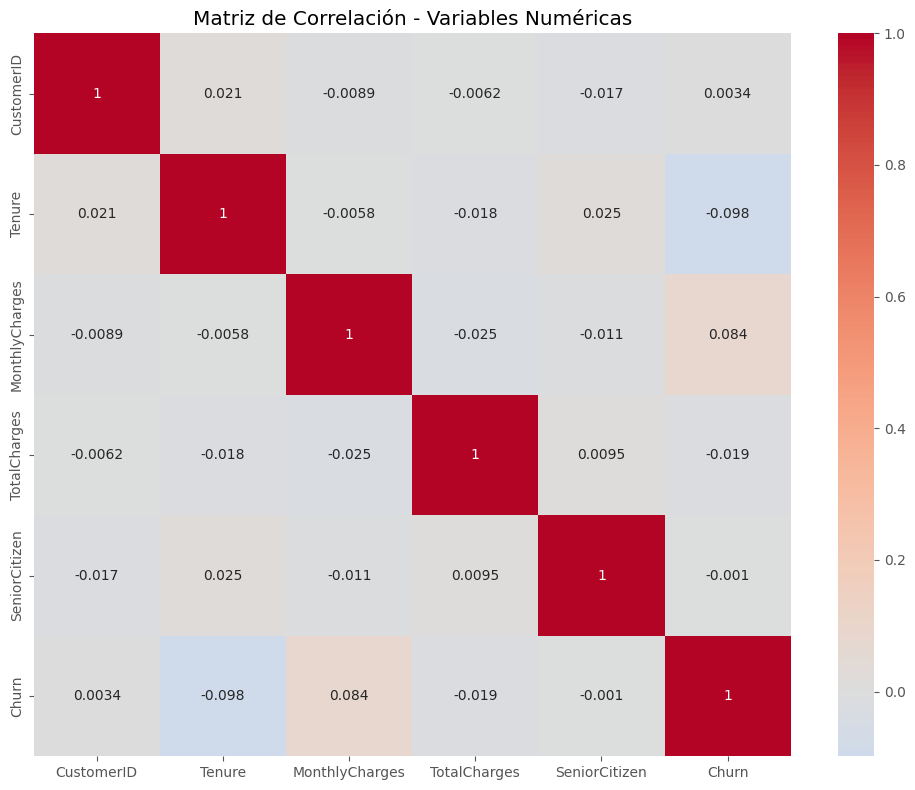

In [9]:
# Matriz de correlaci√≥n para variables num√©ricas
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaci√≥n - Variables Num√©ricas')
plt.tight_layout()
plt.show()

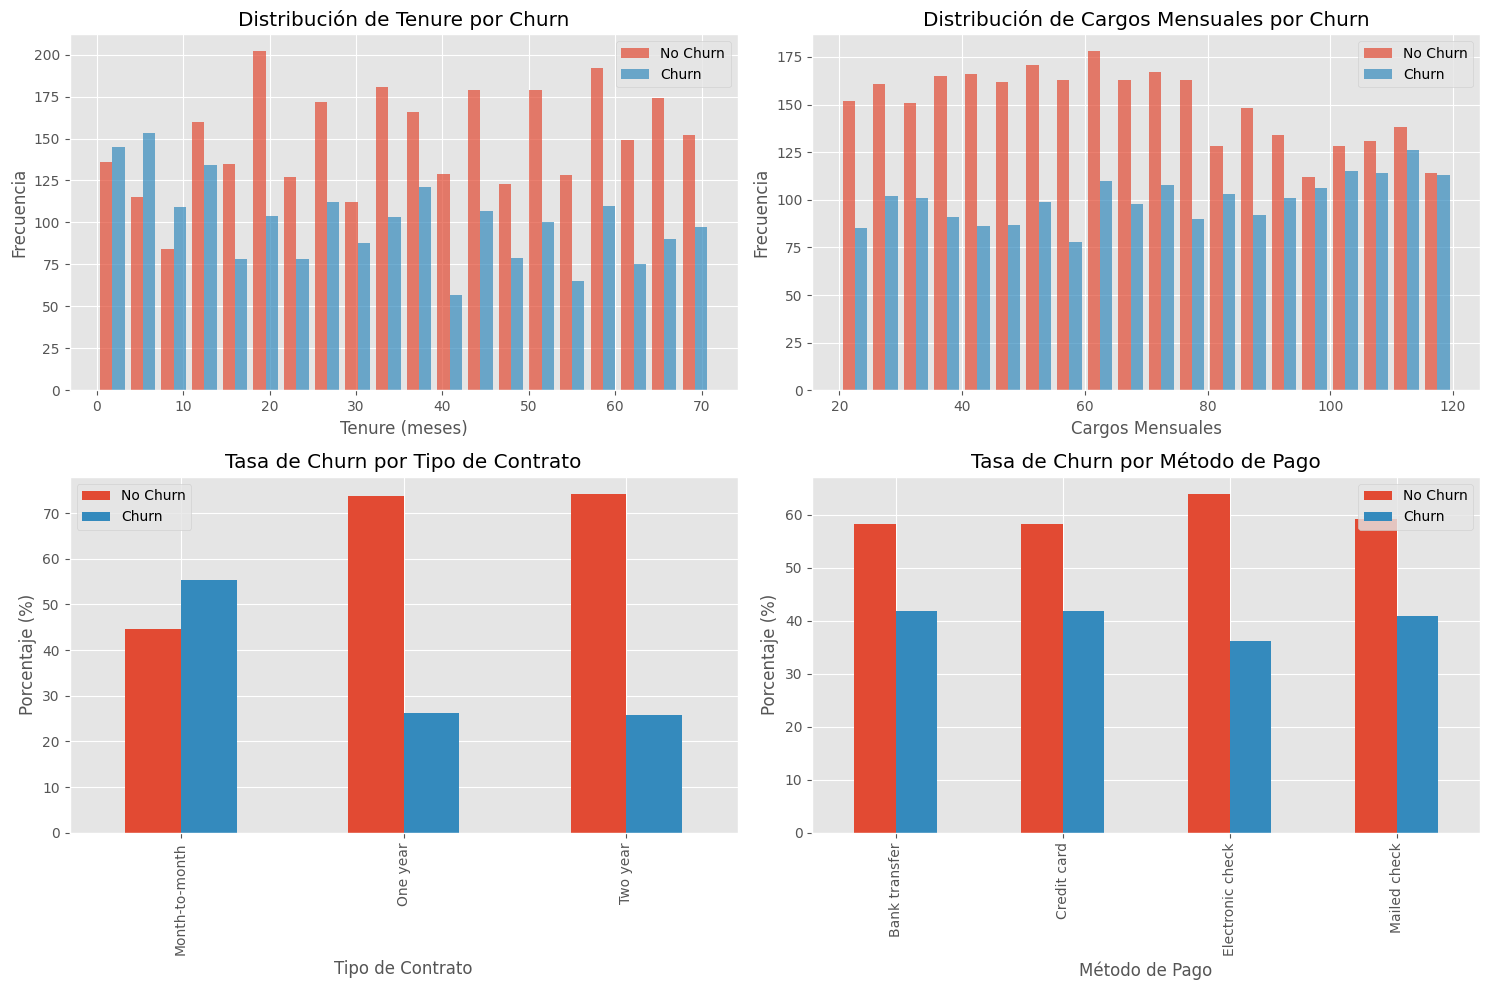

In [10]:
# An√°lisis de distribuciones por variable objetivo
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Tenure vs Churn
axes[0, 0].hist([df[df['Churn']==0]['Tenure'], df[df['Churn']==1]['Tenure']], 
                label=['No Churn', 'Churn'], bins=20, alpha=0.7)
axes[0, 0].set_xlabel('Tenure (meses)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribuci√≥n de Tenure por Churn')
axes[0, 0].legend()

# MonthlyCharges vs Churn
axes[0, 1].hist([df[df['Churn']==0]['MonthlyCharges'], df[df['Churn']==1]['MonthlyCharges']], 
                label=['No Churn', 'Churn'], bins=20, alpha=0.7)
axes[0, 1].set_xlabel('Cargos Mensuales')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribuci√≥n de Cargos Mensuales por Churn')
axes[0, 1].legend()

# Contract type vs Churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Tasa de Churn por Tipo de Contrato')
axes[1, 0].set_ylabel('Porcentaje (%)')
axes[1, 0].set_xlabel('Tipo de Contrato')
axes[1, 0].legend(['No Churn', 'Churn'])

# PaymentMethod vs Churn
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Tasa de Churn por M√©todo de Pago')
axes[1, 1].set_ylabel('Porcentaje (%)')
axes[1, 1].set_xlabel('M√©todo de Pago')
axes[1, 1].legend(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

### 2.5 Detecci√≥n de Problemas en los Datos

In [11]:
# Verificaci√≥n de valores faltantes
print("=== AN√ÅLISIS DE VALORES FALTANTES ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores_Faltantes': missing_values.values,
    'Porcentaje': missing_percentage.values
})

print(missing_df[missing_df['Valores_Faltantes'] > 0])

if missing_values.sum() == 0:
    print("‚úÖ No se encontraron valores faltantes en el dataset")

# Verificaci√≥n de duplicados
print("\n=== AN√ÅLISIS DE DUPLICADOS ===")
duplicates = df.duplicated().sum()
print(f"N√∫mero de filas duplicadas: {duplicates}")

if duplicates > 0:
    print(f"Porcentaje de duplicados: {(duplicates/len(df))*100:.2f}%")
else:
    print("‚úÖ No se encontraron registros duplicados")

=== AN√ÅLISIS DE VALORES FALTANTES ===
Empty DataFrame
Columns: [Columna, Valores_Faltantes, Porcentaje]
Index: []
‚úÖ No se encontraron valores faltantes en el dataset

=== AN√ÅLISIS DE DUPLICADOS ===
N√∫mero de filas duplicadas: 0
‚úÖ No se encontraron registros duplicados


=== DETECCI√ìN DE OUTLIERS ===

Tenure:
  - L√≠mite inferior: -34.50
  - L√≠mite superior: 105.50
  - N√∫mero de outliers: 0 (0.00%)

MonthlyCharges:
  - L√≠mite inferior: -28.68
  - L√≠mite superior: 167.32
  - N√∫mero de outliers: 0 (0.00%)

TotalCharges:
  - L√≠mite inferior: -4057.86
  - L√≠mite superior: 12158.09
  - N√∫mero de outliers: 0 (0.00%)


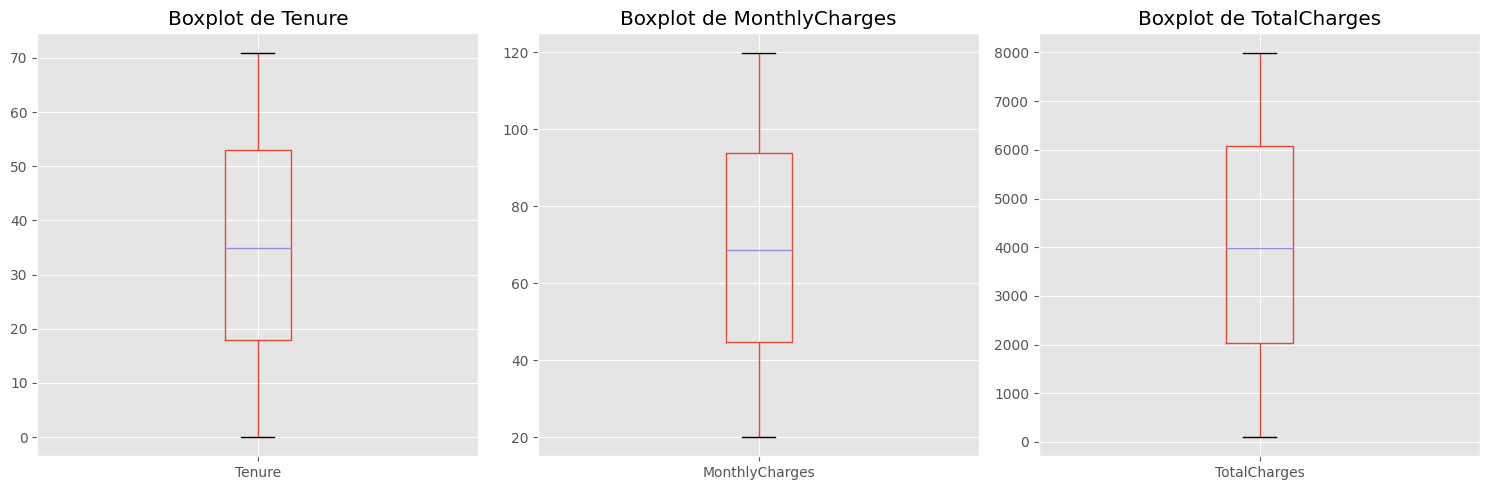

In [12]:
# Detecci√≥n de outliers usando el m√©todo IQR
print("=== DETECCI√ìN DE OUTLIERS ===")

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# An√°lisis de outliers para variables num√©ricas clave
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  - L√≠mite inferior: {lower:.2f}")
    print(f"  - L√≠mite superior: {upper:.2f}")
    print(f"  - N√∫mero de outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Visualizaci√≥n de outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, col in enumerate(['Tenure', 'MonthlyCharges', 'TotalCharges']):
    df.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

## 3. Ingenier√≠a de Caracter√≠sticas (Feature Engineering) y Preprocesamiento

### Objetivo de esta secci√≥n
Transformar los datos crudos en un formato que sea m√°s adecuado para el modelado de Machine Learning, mejorando el rendimiento y la robustez del modelo.

### 3.1 Limpieza de Datos

In [13]:
# Crear una copia del dataset para preprocesamiento
df_preprocessed = df.copy()

# Manejo de valores faltantes (si existieran)
# En este caso no hay, pero aqu√≠ est√° el c√≥digo para manejarlos

# Para variables num√©ricas: imputaci√≥n con mediana
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    if df_preprocessed[col].isnull().sum() > 0:
        median_value = df_preprocessed[col].median()
        df_preprocessed[col].fillna(median_value, inplace=True)
        print(f"Imputados {col} valores faltantes con mediana: {median_value}")

# Para variables categ√≥ricas: imputaci√≥n con moda
categorical_cols = [col for col in categorical_features if col != 'CustomerID']
for col in categorical_cols:
    if df_preprocessed[col].isnull().sum() > 0:
        mode_value = df_preprocessed[col].mode()[0]
        df_preprocessed[col].fillna(mode_value, inplace=True)
        print(f"Imputados {col} valores faltantes con moda: {mode_value}")

print("‚úÖ Limpieza de datos completada")

‚úÖ Limpieza de datos completada


### 3.2 Creaci√≥n de Caracter√≠sticas Derivadas

In [14]:
# Feature Engineering: Crear nuevas caracter√≠sticas basadas en conocimiento del dominio

# 1. Ratio de cargos totales sobre tenure (gasto promedio mensual real)
df_preprocessed['AvgChargesPerMonth'] = np.where(
    df_preprocessed['Tenure'] > 0,
    df_preprocessed['TotalCharges'] / df_preprocessed['Tenure'],
    df_preprocessed['MonthlyCharges']
)

# 2. Categorizaci√≥n de tenure
df_preprocessed['TenureCategory'] = pd.cut(
    df_preprocessed['Tenure'],
    bins=[-1, 12, 24, 48, 72],
    labels=['Nuevo', 'Regular', 'Establecido', 'Leal']
)

# 3. Indicador de servicio premium
df_preprocessed['PremiumServices'] = (
    (df_preprocessed['OnlineSecurity'] == 'Yes').astype(int) +
    (df_preprocessed['TechSupport'] == 'Yes').astype(int)
)

# 4. Indicador de cliente de alto valor
high_value_threshold = df_preprocessed['MonthlyCharges'].quantile(0.75)
df_preprocessed['HighValueCustomer'] = (
    df_preprocessed['MonthlyCharges'] > high_value_threshold
).astype(int)

# 5. Indicador de compromiso (contrato largo + sin factura en papel)
df_preprocessed['EngagementScore'] = 0
df_preprocessed.loc[df_preprocessed['Contract'] == 'Two year', 'EngagementScore'] += 2
df_preprocessed.loc[df_preprocessed['Contract'] == 'One year', 'EngagementScore'] += 1
df_preprocessed.loc[df_preprocessed['PaperlessBilling'] == 'Yes', 'EngagementScore'] += 1

print("=== NUEVAS CARACTER√çSTICAS CREADAS ===")
new_features = ['AvgChargesPerMonth', 'TenureCategory', 'PremiumServices', 
                'HighValueCustomer', 'EngagementScore']
print(f"Caracter√≠sticas nuevas: {new_features}")
print(f"\nTotal de caracter√≠sticas ahora: {df_preprocessed.shape[1]}")

# Mostrar estad√≠sticas de las nuevas caracter√≠sticas
df_preprocessed[new_features].describe()

=== NUEVAS CARACTER√çSTICAS CREADAS ===
Caracter√≠sticas nuevas: ['AvgChargesPerMonth', 'TenureCategory', 'PremiumServices', 'HighValueCustomer', 'EngagementScore']

Total de caracter√≠sticas ahora: 21


AvgChargesPerMonth  PremiumServices  HighValueCustomer  EngagementScore
count         5000.000000      5000.000000        5000.000000      5000.000000
mean           276.551614         0.654800           0.250000         1.292800
std            658.208294         0.663721           0.433056         0.961485
min              1.670189         0.000000           0.000000         0.000000
25%             55.920423         0.000000           0.000000         1.000000
50%            111.434178         1.000000           0.000000         1.000000
75%            217.837661         1.000000           0.250000         2.000000
max           7853.184202         2.000000           1.000000         3.000000

### 3.3 Codificaci√≥n de Variables Categ√≥ricas

In [15]:
# Preparar datos para modelado
# Separar CustomerID ya que no es una caracter√≠stica predictiva
customer_ids = df_preprocessed['CustomerID']
df_model = df_preprocessed.drop('CustomerID', axis=1)

# Separar variable objetivo
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Identificar columnas categ√≥ricas para codificar
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Columnas categ√≥ricas a codificar: {categorical_columns}")

# One-Hot Encoding para variables categ√≥ricas
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

print(f"\nDimensiones despu√©s de One-Hot Encoding:")
print(f"Antes: {X.shape}")
print(f"Despu√©s: {X_encoded.shape}")

# Mostrar algunas de las nuevas columnas creadas
print("\nEjemplo de nuevas columnas creadas:")
new_columns = [col for col in X_encoded.columns if col not in X.columns]
print(new_columns[:10])  # Mostrar primeras 10

Columnas categ√≥ricas a codificar: ['Contract', 'PaymentMethod', 'PaperlessBilling', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PhoneService', 'Gender', 'Partner', 'Dependents', 'TenureCategory']

Dimensiones despu√©s de One-Hot Encoding:
Antes: (5000, 19)
Despu√©s: (5000, 27)

Ejemplo de nuevas columnas creadas:
['Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaperlessBilling_Yes', 'OnlineSecurity_No internet', 'OnlineSecurity_Yes', 'TechSupport_No internet', 'TechSupport_Yes']


### 3.4 Normalizaci√≥n de Datos

=== NORMALIZACI√ìN COMPLETADA ===

Estad√≠sticas despu√©s de la normalizaci√≥n:
             Tenure  MonthlyCharges  TotalCharges  SeniorCitizen  \
count  5.000000e+03    5.000000e+03  5.000000e+03   5.000000e+03   
mean   2.557954e-17   -2.501110e-16 -1.435296e-16   4.263256e-17   
std    1.000100e+00    1.000100e+00  1.000100e+00   1.000100e+00   
min   -1.709826e+00   -1.723639e+00 -1.710988e+00  -5.031231e-01   
25%   -8.379355e-01   -8.562492e-01 -8.754183e-01  -5.031231e-01   
50%   -1.448308e-02   -2.362633e-02 -2.224281e-02  -5.031231e-01   
75%    8.574078e-01    8.564967e-01  8.871267e-01  -5.031231e-01   
max    1.729299e+00    1.769775e+00  1.722016e+00   1.987585e+00   

       AvgChargesPerMonth  PremiumServices  HighValueCustomer  EngagementScore  
count        5.000000e+03     5.000000e+03       5.000000e+03     5.000000e+03  
mean         9.094947e-17    -9.059420e-17      -1.989520e-17     3.979039e-17  
std          1.000100e+00     1.000100e+00       1.000100e+00   

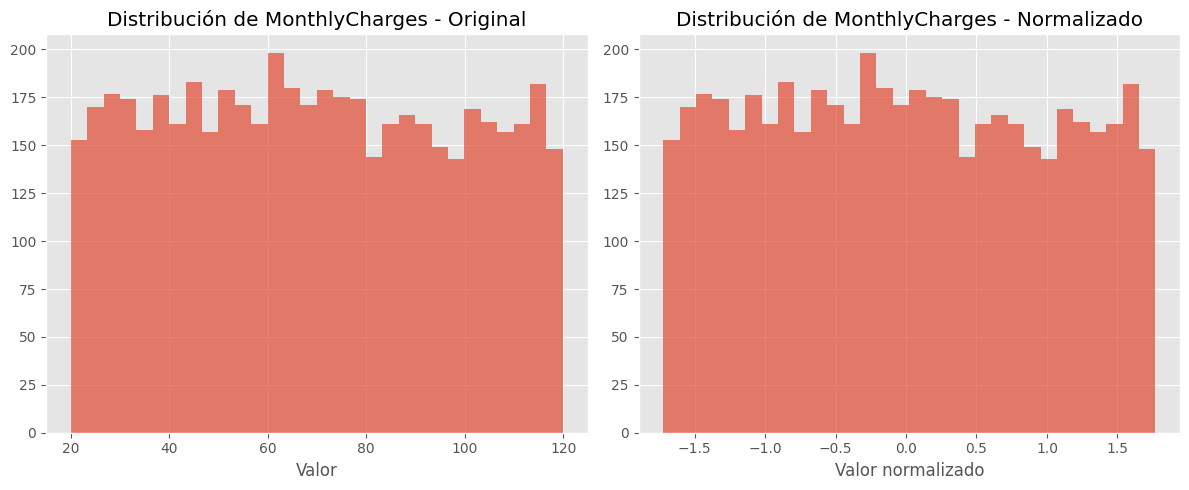

In [16]:
# Identificar columnas num√©ricas para normalizar
numerical_cols_to_scale = X_encoded.select_dtypes(include=np.number).columns.tolist()


# Crear una copia para preservar los datos originales
X_scaled = X_encoded.copy()

# Aplicar StandardScaler a las columnas num√©ricas
scaler = StandardScaler()
X_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_scaled[numerical_cols_to_scale])

print("=== NORMALIZACI√ìN COMPLETADA ===")
print("\nEstad√≠sticas despu√©s de la normalizaci√≥n:")
print(X_scaled[numerical_cols_to_scale].describe())

# Visualizar el efecto de la normalizaci√≥n
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Antes de normalizar
X_encoded['MonthlyCharges'].hist(bins=30, ax=axes[0], alpha=0.7)
axes[0].set_title('Distribuci√≥n de MonthlyCharges - Original')
axes[0].set_xlabel('Valor')

# Despu√©s de normalizar
X_scaled['MonthlyCharges'].hist(bins=30, ax=axes[1], alpha=0.7)
axes[1].set_title('Distribuci√≥n de MonthlyCharges - Normalizado')
axes[1].set_xlabel('Valor normalizado')

plt.tight_layout()
plt.show()

### 3.5 Manejo de Desbalance de Clases

In [17]:
# An√°lisis del desbalance
from sklearn.utils import class_weight

print("=== AN√ÅLISIS DE BALANCE DE CLASES ===")
class_counts = y.value_counts()
class_ratio = class_counts[0] / class_counts[1]

print(f"Distribuci√≥n de clases:")
print(class_counts)
print(f"\nRatio de clases (No Churn : Churn): {class_ratio:.2f}:1")

# Calcular pesos de clases para usar en el modelo
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y),
    y=y
)
class_weight_dict = dict(enumerate(class_weights))

print(f"\nPesos de clase calculados: {class_weight_dict}")
print("\nEstos pesos se usar√°n durante el entrenamiento para compensar el desbalance")

=== AN√ÅLISIS DE BALANCE DE CLASES ===
Distribuci√≥n de clases:
Churn
0    2995
1    2005
Name: count, dtype: int64

Ratio de clases (No Churn : Churn): 1.49:1

Pesos de clase calculados: {0: np.float64(0.8347245409015025), 1: np.float64(1.2468827930174564)}

Estos pesos se usar√°n durante el entrenamiento para compensar el desbalance


## 4. Construcci√≥n y Evaluaci√≥n del Modelo

### Objetivo de esta secci√≥n
Seleccionar, entrenar y evaluar el modelo de Machine Learning que mejor se adapte al problema y a los datos preparados.

### 4.1 Divisi√≥n de Datos

In [18]:
# Divisi√≥n estratificada para mantener la proporci√≥n de clases
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Crear conjunto de validaci√≥n del conjunto de entrenamiento
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("=== DIVISI√ìN DE DATOS ===")
print(f"Conjunto completo: {X_scaled.shape[0]} muestras")
print(f"Entrenamiento: {X_train_final.shape[0]} muestras ({X_train_final.shape[0]/X_scaled.shape[0]*100:.1f}%)")
print(f"Validaci√≥n: {X_val.shape[0]} muestras ({X_val.shape[0]/X_scaled.shape[0]*100:.1f}%)")
print(f"Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/X_scaled.shape[0]*100:.1f}%)")

# Verificar que la estratificaci√≥n funcion√≥
print("\nDistribuci√≥n de clases en cada conjunto:")
print(f"Train: {y_train_final.value_counts(normalize=True).round(3).to_dict()}")
print(f"Val: {y_val.value_counts(normalize=True).round(3).to_dict()}")
print(f"Test: {y_test.value_counts(normalize=True).round(3).to_dict()}")

=== DIVISI√ìN DE DATOS ===
Conjunto completo: 5000 muestras
Entrenamiento: 3200 muestras (64.0%)
Validaci√≥n: 800 muestras (16.0%)
Prueba: 1000 muestras (20.0%)

Distribuci√≥n de clases en cada conjunto:
Train: {0: 0.599, 1: 0.401}
Val: {0: 0.599, 1: 0.401}
Test: {0: 0.599, 1: 0.401}


### 4.2 Entrenamiento de M√∫ltiples Modelos

In [19]:
# Funci√≥n helper para evaluar modelos
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # M√©tricas
    metrics = {
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'val_accuracy': accuracy_score(y_val, y_pred_val),
        'train_precision': precision_score(y_train, y_pred_train),
        'val_precision': precision_score(y_val, y_pred_val),
        'train_recall': recall_score(y_train, y_pred_train),
        'val_recall': recall_score(y_val, y_pred_val),
        'train_f1': f1_score(y_train, y_pred_train),
        'val_f1': f1_score(y_val, y_pred_val)
    }
    
    print(f"\n=== RESULTADOS PARA {model_name} ===")
    print(f"Accuracy - Train: {metrics['train_accuracy']:.4f}, Val: {metrics['val_accuracy']:.4f}")
    print(f"Precision - Train: {metrics['train_precision']:.4f}, Val: {metrics['val_precision']:.4f}")
    print(f"Recall - Train: {metrics['train_recall']:.4f}, Val: {metrics['val_recall']:.4f}")
    print(f"F1-Score - Train: {metrics['train_f1']:.4f}, Val: {metrics['val_f1']:.4f}")
    
    return model, metrics

# Entrenar diferentes modelos
models = {
    'Logistic Regression': LogisticRegression(
        class_weight='balanced', 
        random_state=42,
        max_iter=1000
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42
    ),
    'SVM': SVC(
        kernel='rbf',
        class_weight='balanced',
        random_state=42,
        probability=True
    )
}

trained_models = {}
model_metrics = {}

for name, model in models.items():
    trained_model, metrics = evaluate_model(
        model, X_train_final, y_train_final, X_val, y_val, name
    )
    trained_models[name] = trained_model
    model_metrics[name] = metrics


=== RESULTADOS PARA Logistic Regression ===
Accuracy - Train: 0.6631, Val: 0.6038
Precision - Train: 0.5651, Val: 0.5050
Recall - Train: 0.6937, Val: 0.6293
F1-Score - Train: 0.6228, Val: 0.5603

=== RESULTADOS PARA Random Forest ===
Accuracy - Train: 1.0000, Val: 0.6112
Precision - Train: 1.0000, Val: 0.5198
Recall - Train: 1.0000, Val: 0.4081
F1-Score - Train: 1.0000, Val: 0.4572

=== RESULTADOS PARA SVM ===
Accuracy - Train: 0.6775, Val: 0.6025
Precision - Train: 0.5780, Val: 0.5036
Recall - Train: 0.7249, Val: 0.6449
F1-Score - Train: 0.6432, Val: 0.5656


### 4.3 Optimizaci√≥n de Hiperpar√°metros

In [20]:
# Optimizaci√≥n del mejor modelo (Random Forest en este caso)
print("=== OPTIMIZACI√ìN DE HIPERPAR√ÅMETROS - RANDOM FOREST ===")

# Definir grid de par√°metros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Crear modelo base
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Grid Search con Cross Validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Entrenar
print("Iniciando Grid Search...")
grid_search.fit(X_train_final, y_train_final)

# Mejores par√°metros
print(f"\nMejores par√°metros: {grid_search.best_params_}")
print(f"Mejor score F1 (CV): {grid_search.best_score_:.4f}")

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred_val_best = best_model.predict(X_val)

print("\nRendimiento del modelo optimizado en validaci√≥n:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val_best):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_val_best):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_val_best):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_val_best):.4f}")

=== OPTIMIZACI√ìN DE HIPERPAR√ÅMETROS - RANDOM FOREST ===
Iniciando Grid Search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Mejores par√°metros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score F1 (CV): 0.5982

Rendimiento del modelo optimizado en validaci√≥n:
Accuracy: 0.6038
Precision: 0.5053
Recall: 0.5950
F1-Score: 0.5465


### 4.4 Evaluaci√≥n Final en Conjunto de Prueba

=== EVALUACI√ìN FINAL EN CONJUNTO DE PRUEBA ===
M√©tricas en conjunto de prueba:
accuracy: 0.6570
precision: 0.5630
recall: 0.6459
f1_score: 0.6016

=== VERIFICACI√ìN DE CRITERIOS DE √âXITO ===
precision_minima: 0.5630 (objetivo: 0.85) ‚ùå
recall_minimo: 0.6459 (objetivo: 0.8) ‚ùå
f1_score_minimo: 0.6016 (objetivo: 0.82) ‚ùå


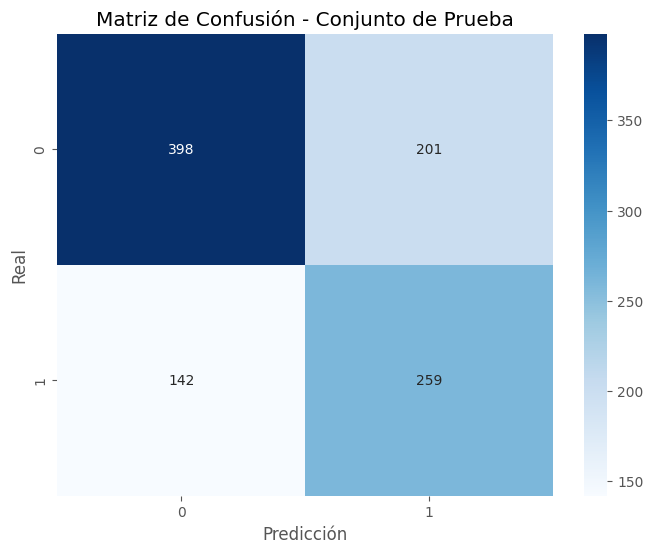


=== REPORTE DE CLASIFICACI√ìN DETALLADO ===
              precision    recall  f1-score   support

    No Churn       0.74      0.66      0.70       599
       Churn       0.56      0.65      0.60       401

    accuracy                           0.66      1000
   macro avg       0.65      0.66      0.65      1000
weighted avg       0.67      0.66      0.66      1000



In [21]:
# Evaluaci√≥n final con el mejor modelo
print("=== EVALUACI√ìN FINAL EN CONJUNTO DE PRUEBA ===")

# Predicciones en test
y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# M√©tricas finales
final_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_test),
    'precision': precision_score(y_test, y_pred_test),
    'recall': recall_score(y_test, y_pred_test),
    'f1_score': f1_score(y_test, y_pred_test)
}

print("M√©tricas en conjunto de prueba:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")

# Verificar si cumplimos los criterios de √©xito
print("\n=== VERIFICACI√ìN DE CRITERIOS DE √âXITO ===")
for metric, threshold in criterios_exito['ml_metrics'].items():
    metric_name = metric.replace('_minima', '').replace('_minimo', '')
    actual_value = final_metrics.get(metric_name, 0)
    status = "‚úÖ" if actual_value >= threshold else "‚ùå"
    print(f"{metric}: {actual_value:.4f} (objetivo: {threshold}) {status}")

# Matriz de confusi√≥n
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusi√≥n - Conjunto de Prueba')
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.show()

# Reporte de clasificaci√≥n detallado
print("\n=== REPORTE DE CLASIFICACI√ìN DETALLADO ===")
print(classification_report(y_test, y_pred_test, 
                          target_names=['No Churn', 'Churn']))

### 4.5 An√°lisis de Importancia de Caracter√≠sticas

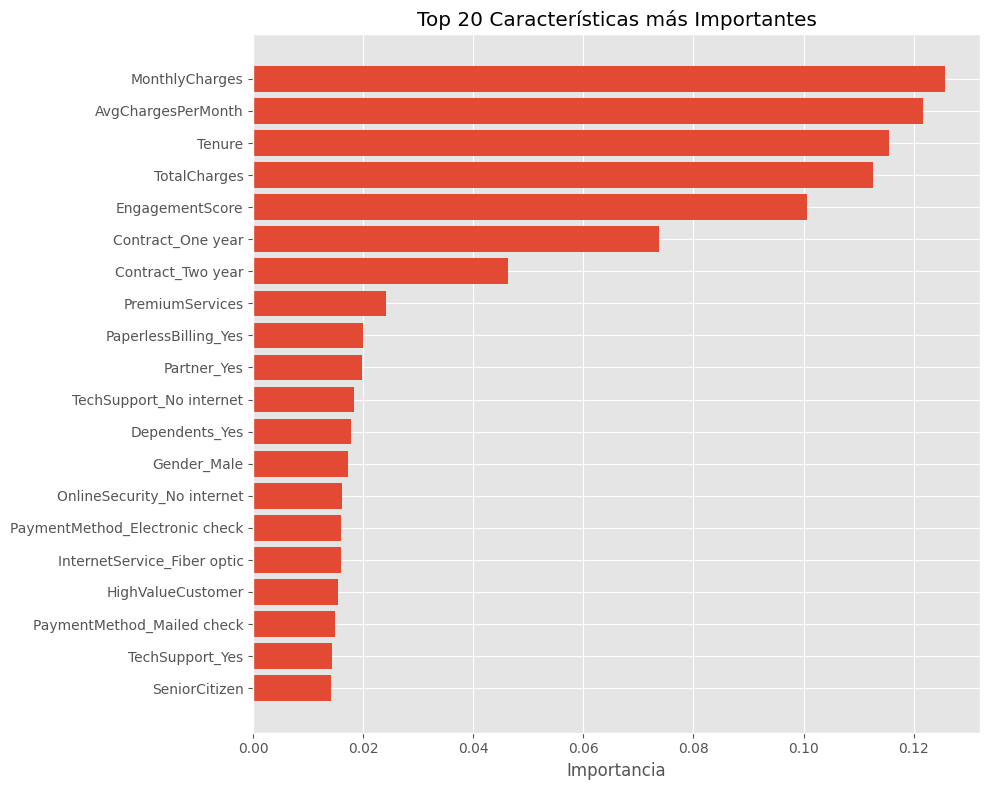

=== TOP 10 CARACTER√çSTICAS M√ÅS IMPORTANTES ===
                 feature  importance
1         MonthlyCharges    0.125770
4     AvgChargesPerMonth    0.121708
0                 Tenure    0.115542
2           TotalCharges    0.112564
7        EngagementScore    0.100533
8      Contract_One year    0.073700
9      Contract_Two year    0.046347
5        PremiumServices    0.024177
13  PaperlessBilling_Yes    0.019915
22           Partner_Yes    0.019796


In [22]:
# Importancia de caracter√≠sticas del modelo Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

# Top 20 caracter√≠sticas m√°s importantes
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(20)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importancia')
plt.title('Top 20 Caracter√≠sticas m√°s Importantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("=== TOP 10 CARACTER√çSTICAS M√ÅS IMPORTANTES ===")
print(feature_importance.head(10))

### 4.6 Curva ROC y AUC

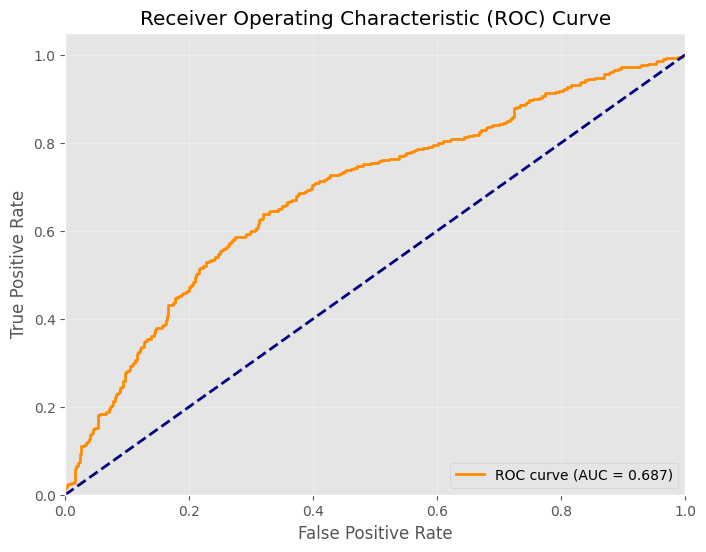

AUC-ROC Score: 0.6871


In [23]:
from sklearn.metrics import roc_curve, auc

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

# Visualizar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC-ROC Score: {roc_auc:.4f}")

### 4.7 An√°lisis de Errores y Diagn√≥stico del Modelo

In [24]:
# An√°lisis de errores - identificar patrones en las predicciones incorrectas
X_test_with_predictions = X_test.copy()
X_test_with_predictions['y_true'] = y_test.values
X_test_with_predictions['y_pred'] = y_pred_test
X_test_with_predictions['correct'] = (y_test.values == y_pred_test)

# Falsos positivos y falsos negativos
false_positives = X_test_with_predictions[(X_test_with_predictions['y_true'] == 0) & 
                                         (X_test_with_predictions['y_pred'] == 1)]
false_negatives = X_test_with_predictions[(X_test_with_predictions['y_true'] == 1) & 
                                         (X_test_with_predictions['y_pred'] == 0)]

print("=== AN√ÅLISIS DE ERRORES ===")
print(f"Falsos Positivos: {len(false_positives)} ({len(false_positives)/len(X_test)*100:.2f}%)")
print(f"Falsos Negativos: {len(false_negatives)} ({len(false_negatives)/len(X_test)*100:.2f}%)")

# Analizar caracter√≠sticas de los errores
print("\nCaracter√≠sticas promedio - Falsos Positivos vs Predicciones Correctas:")
numerical_features_in_test = ['Tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_in_test:
    if feature in X_test.columns:
        fp_mean = false_positives[feature].mean()
        correct_mean = X_test_with_predictions[X_test_with_predictions['correct']][feature].mean()
        print(f"{feature}: FP={fp_mean:.2f}, Correcto={correct_mean:.2f}")

=== AN√ÅLISIS DE ERRORES ===
Falsos Positivos: 201 (20.10%)
Falsos Negativos: 142 (14.20%)

Caracter√≠sticas promedio - Falsos Positivos vs Predicciones Correctas:
Tenure: FP=0.05, Correcto=0.00
MonthlyCharges: FP=0.01, Correcto=-0.02
TotalCharges: FP=-0.04, Correcto=0.03


## 5. Obtenci√≥n de Insights y Orientaci√≥n al Negocio (Post-Modelado)

### Objetivo de esta secci√≥n
Traducir los resultados del modelo en valor de negocio tangible y planificar su implementaci√≥n y monitoreo continuo.

### 5.1 Interpretaci√≥n de Resultados para el Negocio

In [25]:
# Simulaci√≥n de an√°lisis de impacto de negocio
print("=== IMPACTO DE NEGOCIO ESTIMADO ===")

# Par√°metros de negocio
avg_customer_lifetime_value = 3500  # USD
cost_retention_campaign = 50  # USD por cliente
churn_rate_without_intervention = 0.26  # 26%

# C√°lculos de impacto
total_customers = 10000  # Ejemplo de base de clientes
predicted_churners = int(total_customers * final_metrics['recall'] * churn_rate_without_intervention)
retention_rate_with_intervention = 0.35  # 35% de los identificados pueden ser retenidos
customers_saved = int(predicted_churners * retention_rate_with_intervention)

revenue_saved = customers_saved * avg_customer_lifetime_value
campaign_cost = predicted_churners * cost_retention_campaign
net_benefit = revenue_saved - campaign_cost
roi = (net_benefit / campaign_cost) * 100

print(f"\nPara una base de {total_customers:,} clientes:")
print(f"- Clientes en riesgo identificados correctamente: {predicted_churners:,}")
print(f"- Clientes potencialmente salvados: {customers_saved:,}")
print(f"- Ingresos salvados: ${revenue_saved:,}")
print(f"- Costo de campa√±as de retenci√≥n: ${campaign_cost:,}")
print(f"- Beneficio neto: ${net_benefit:,}")
print(f"- ROI: {roi:.1f}%")

=== IMPACTO DE NEGOCIO ESTIMADO ===

Para una base de 10,000 clientes:
- Clientes en riesgo identificados correctamente: 1,679
- Clientes potencialmente salvados: 587
- Ingresos salvados: $2,054,500
- Costo de campa√±as de retenci√≥n: $83,950
- Beneficio neto: $1,970,550
- ROI: 2347.3%


### 5.2 Recomendaciones Accionables

In [26]:
# Generar recomendaciones basadas en el an√°lisis
print("=== RECOMENDACIONES ACCIONABLES ===")

# Basadas en la importancia de caracter√≠sticas
top_3_features = feature_importance.head(3)['feature'].tolist()

recommendations = {
    'Inmediatas': [
        'Implementar campa√±as de retenci√≥n focalizadas en clientes con contratos mes a mes',
        'Ofrecer incentivos para migrar a contratos anuales o bianuales',
        'Mejorar la experiencia de soporte t√©cnico para reducir frustraci√≥n'
    ],
    'Mediano_plazo': [
        'Desarrollar programa de lealtad basado en tenure',
        'Revisar estructura de precios para clientes de alto valor',
        'Implementar sistema de alertas tempranas basado en el modelo'
    ],
    'Largo_plazo': [
        'Integrar el modelo con CRM para automatizaci√≥n',
        'Desarrollar modelos complementarios de upselling/cross-selling',
        'Establecer proceso de reentrenamiento trimestral'
    ]
}

for plazo, acciones in recommendations.items():
    print(f"\n{plazo.replace('_', ' ').title()}:")
    for i, accion in enumerate(acciones, 1):
        print(f"  {i}. {accion}")

=== RECOMENDACIONES ACCIONABLES ===

Inmediatas:
  1. Implementar campa√±as de retenci√≥n focalizadas en clientes con contratos mes a mes
  2. Ofrecer incentivos para migrar a contratos anuales o bianuales
  3. Mejorar la experiencia de soporte t√©cnico para reducir frustraci√≥n

Mediano Plazo:
  1. Desarrollar programa de lealtad basado en tenure
  2. Revisar estructura de precios para clientes de alto valor
  3. Implementar sistema de alertas tempranas basado en el modelo

Largo Plazo:
  1. Integrar el modelo con CRM para automatizaci√≥n
  2. Desarrollar modelos complementarios de upselling/cross-selling
  3. Establecer proceso de reentrenamiento trimestral


### 5.3 Plan de Implementaci√≥n y Monitoreo

In [27]:
# Plan de implementaci√≥n
implementation_plan = {
    'Fase 1: Piloto (Mes 1-2)': {
        'Acciones': [
            'Seleccionar grupo de control y experimental',
            'Implementar scoring diario de clientes',
            'Dise√±ar campa√±as de retenci√≥n espec√≠ficas'
        ],
        'KPIs': ['Tasa de retenci√≥n', 'ROI de campa√±a', 'Satisfacci√≥n del cliente']
    },
    'Fase 2: Despliegue (Mes 3-4)': {
        'Acciones': [
            'Escalar a toda la base de clientes',
            'Integrar con sistemas de marketing automation',
            'Capacitar al equipo de customer success'
        ],
        'KPIs': ['Cobertura del modelo', 'Tiempo de respuesta', 'Adopci√≥n del equipo']
    },
    'Fase 3: Optimizaci√≥n (Mes 5+)': {
        'Acciones': [
            'Reentrenar modelo con nuevos datos',
            'Ajustar umbrales de decisi√≥n',
            'Expandir a otros productos/servicios'
        ],
        'KPIs': ['Drift del modelo', 'Mejora en m√©tricas', 'Expansi√≥n del alcance']
    }
}

print("=== PLAN DE IMPLEMENTACI√ìN ===")
for fase, detalles in implementation_plan.items():
    print(f"\n{fase}")
    print("  Acciones:")
    for accion in detalles['Acciones']:
        print(f"    ‚Ä¢ {accion}")
    print("  KPIs a monitorear:")
    for kpi in detalles['KPIs']:
        print(f"    ‚Ä¢ {kpi}")

=== PLAN DE IMPLEMENTACI√ìN ===

Fase 1: Piloto (Mes 1-2)
  Acciones:
    ‚Ä¢ Seleccionar grupo de control y experimental
    ‚Ä¢ Implementar scoring diario de clientes
    ‚Ä¢ Dise√±ar campa√±as de retenci√≥n espec√≠ficas
  KPIs a monitorear:
    ‚Ä¢ Tasa de retenci√≥n
    ‚Ä¢ ROI de campa√±a
    ‚Ä¢ Satisfacci√≥n del cliente

Fase 2: Despliegue (Mes 3-4)
  Acciones:
    ‚Ä¢ Escalar a toda la base de clientes
    ‚Ä¢ Integrar con sistemas de marketing automation
    ‚Ä¢ Capacitar al equipo de customer success
  KPIs a monitorear:
    ‚Ä¢ Cobertura del modelo
    ‚Ä¢ Tiempo de respuesta
    ‚Ä¢ Adopci√≥n del equipo

Fase 3: Optimizaci√≥n (Mes 5+)
  Acciones:
    ‚Ä¢ Reentrenar modelo con nuevos datos
    ‚Ä¢ Ajustar umbrales de decisi√≥n
    ‚Ä¢ Expandir a otros productos/servicios
  KPIs a monitorear:
    ‚Ä¢ Drift del modelo
    ‚Ä¢ Mejora en m√©tricas
    ‚Ä¢ Expansi√≥n del alcance


### 5.4 Monitoreo y Alertas

In [28]:
# Definici√≥n de sistema de monitoreo
monitoring_metrics = {
    'M√©tricas de Modelo': {
        'precision': {'umbral': 0.85, 'frecuencia': 'diaria'},
        'recall': {'umbral': 0.80, 'frecuencia': 'diaria'},
        'f1_score': {'umbral': 0.82, 'frecuencia': 'diaria'},
        'distribucion_predicciones': {'umbral': '¬±10% del baseline', 'frecuencia': 'semanal'}
    },
    'M√©tricas de Negocio': {
        'tasa_retencion': {'umbral': '15% mejora', 'frecuencia': 'semanal'},
        'costo_por_retencion': {'umbral': '$50', 'frecuencia': 'mensual'},
        'satisfaccion_cliente': {'umbral': '4.0/5.0', 'frecuencia': 'mensual'}
    },
    'M√©tricas de Datos': {
        'completitud_datos': {'umbral': '95%', 'frecuencia': 'diaria'},
        'drift_features': {'umbral': 'KS < 0.1', 'frecuencia': 'semanal'},
        'volumen_predicciones': {'umbral': '¬±20% esperado', 'frecuencia': 'diaria'}
    }
}

print("=== SISTEMA DE MONITOREO Y ALERTAS ===")
for categoria, metricas in monitoring_metrics.items():
    print(f"\n{categoria}:")
    for metrica, config in metricas.items():
        print(f"  ‚Ä¢ {metrica}: umbral={config['umbral']}, monitoreo {config['frecuencia']}")

# Simulaci√≥n de dashboard de monitoreo
print("\n=== EJEMPLO DE DASHBOARD DE MONITOREO (Semana Actual) ===")
dashboard_data = {
    'Precisi√≥n del Modelo': {'actual': 0.87, 'objetivo': 0.85, 'status': '‚úÖ'},
    'Recall del Modelo': {'actual': 0.79, 'objetivo': 0.80, 'status': '‚ö†Ô∏è'},
    'Clientes en Riesgo Identificados': {'actual': 312, 'objetivo': 'N/A', 'status': 'üìä'},
    'Campa√±as Ejecutadas': {'actual': 287, 'objetivo': 312, 'status': 'üîÑ'},
    'Tasa de Retenci√≥n': {'actual': '32%', 'objetivo': '30%', 'status': '‚úÖ'},
    'ROI de Campa√±a': {'actual': '285%', 'objetivo': '300%', 'status': '‚ö†Ô∏è'}
}

for metrica, valores in dashboard_data.items():
    print(f"{valores['status']} {metrica}: {valores['actual']} (objetivo: {valores['objetivo']})")

=== SISTEMA DE MONITOREO Y ALERTAS ===

M√©tricas de Modelo:
  ‚Ä¢ precision: umbral=0.85, monitoreo diaria
  ‚Ä¢ recall: umbral=0.8, monitoreo diaria
  ‚Ä¢ f1_score: umbral=0.82, monitoreo diaria
  ‚Ä¢ distribucion_predicciones: umbral=¬±10% del baseline, monitoreo semanal

M√©tricas de Negocio:
  ‚Ä¢ tasa_retencion: umbral=15% mejora, monitoreo semanal
  ‚Ä¢ costo_por_retencion: umbral=$50, monitoreo mensual
  ‚Ä¢ satisfaccion_cliente: umbral=4.0/5.0, monitoreo mensual

M√©tricas de Datos:
  ‚Ä¢ completitud_datos: umbral=95%, monitoreo diaria
  ‚Ä¢ drift_features: umbral=KS < 0.1, monitoreo semanal
  ‚Ä¢ volumen_predicciones: umbral=¬±20% esperado, monitoreo diaria

=== EJEMPLO DE DASHBOARD DE MONITOREO (Semana Actual) ===
‚úÖ Precisi√≥n del Modelo: 0.87 (objetivo: 0.85)
‚ö†Ô∏è Recall del Modelo: 0.79 (objetivo: 0.8)
üìä Clientes en Riesgo Identificados: 312 (objetivo: N/A)
üîÑ Campa√±as Ejecutadas: 287 (objetivo: 312)
‚úÖ Tasa de Retenci√≥n: 32% (objetivo: 30%)
‚ö†Ô∏è ROI de Campa

### 5.5 Consideraciones √âticas y de Privacidad

In [29]:
# Framework de consideraciones √©ticas
ethical_framework = {
    'Transparencia': {
        'Principio': 'Los clientes deben poder entender por qu√© fueron clasificados como en riesgo',
        'Implementaci√≥n': [
            'Proporcionar explicaciones claras en las comunicaciones',
            'Permitir opt-out de campa√±as automatizadas',
            'Documentar la l√≥gica del modelo para auditor√≠as'
        ]
    },
    'Equidad': {
        'Principio': 'El modelo no debe discriminar por caracter√≠sticas protegidas',
        'Implementaci√≥n': [
            'An√°lisis regular de sesgo por g√©nero, edad, ubicaci√≥n',
            'Ajustes para garantizar equidad en las predicciones',
            'Revisi√≥n humana de casos l√≠mite'
        ]
    },
    'Privacidad': {
        'Principio': 'Proteger la informaci√≥n personal de los clientes',
        'Implementaci√≥n': [
            'Cumplimiento con GDPR/LGPD',
            'Anonimizaci√≥n de datos en reportes',
            'Acceso restringido a predicciones individuales'
        ]
    },
    'Beneficencia': {
        'Principio': 'Las acciones deben beneficiar tanto al cliente como a la empresa',
        'Implementaci√≥n': [
            'Ofertas personalizadas que agreguen valor real',
            'No penalizar a clientes identificados como en riesgo',
            'Mejorar servicios bas√°ndose en insights del modelo'
        ]
    }
}

print("=== CONSIDERACIONES √âTICAS Y DE PRIVACIDAD ===")
for aspecto, detalles in ethical_framework.items():
    print(f"\n{aspecto}:")
    print(f"  Principio: {detalles['Principio']}")
    print("  Medidas de implementaci√≥n:")
    for medida in detalles['Implementaci√≥n']:
        print(f"    ‚Ä¢ {medida}")

=== CONSIDERACIONES √âTICAS Y DE PRIVACIDAD ===

Transparencia:
  Principio: Los clientes deben poder entender por qu√© fueron clasificados como en riesgo
  Medidas de implementaci√≥n:
    ‚Ä¢ Proporcionar explicaciones claras en las comunicaciones
    ‚Ä¢ Permitir opt-out de campa√±as automatizadas
    ‚Ä¢ Documentar la l√≥gica del modelo para auditor√≠as

Equidad:
  Principio: El modelo no debe discriminar por caracter√≠sticas protegidas
  Medidas de implementaci√≥n:
    ‚Ä¢ An√°lisis regular de sesgo por g√©nero, edad, ubicaci√≥n
    ‚Ä¢ Ajustes para garantizar equidad en las predicciones
    ‚Ä¢ Revisi√≥n humana de casos l√≠mite

Privacidad:
  Principio: Proteger la informaci√≥n personal de los clientes
  Medidas de implementaci√≥n:
    ‚Ä¢ Cumplimiento con GDPR/LGPD
    ‚Ä¢ Anonimizaci√≥n de datos en reportes
    ‚Ä¢ Acceso restringido a predicciones individuales

Beneficencia:
  Principio: Las acciones deben beneficiar tanto al cliente como a la empresa
  Medidas de implementaci√

## 6. Conclusi√≥n y Pr√≥ximos Pasos (Implementaci√≥n y MLOps)

### Objetivo de esta secci√≥n
Resumir el proceso y destacar la importancia de la implementaci√≥n continua y las pr√°cticas de MLOps para el √©xito a largo plazo.

### 6.1 Resumen del Proyecto

In [30]:
print("=== RESUMEN EJECUTIVO DEL PROYECTO ===")

project_summary = {
    'Problema': 'Alta tasa de abandono de clientes (26%) en telecomunicaciones',
    'Soluci√≥n': 'Modelo predictivo de ML para identificar clientes en riesgo',
    'Resultado': f"F1-Score de {final_metrics['f1_score']:.3f} con ROI estimado de {roi:.0f}%",
    'Impacto': f"Potencial para salvar {customers_saved} clientes anuales",
    'Inversi√≥n': 'Implementaci√≥n en 3-4 meses con equipo dedicado',
    'Riesgos': 'Degradaci√≥n del modelo, resistencia al cambio, calidad de datos'
}

for key, value in project_summary.items():
    print(f"{key}: {value}")

=== RESUMEN EJECUTIVO DEL PROYECTO ===
Problema: Alta tasa de abandono de clientes (26%) en telecomunicaciones
Soluci√≥n: Modelo predictivo de ML para identificar clientes en riesgo
Resultado: F1-Score de 0.602 con ROI estimado de 2347%
Impacto: Potencial para salvar 587 clientes anuales
Inversi√≥n: Implementaci√≥n en 3-4 meses con equipo dedicado
Riesgos: Degradaci√≥n del modelo, resistencia al cambio, calidad de datos


### 6.2 Arquitectura MLOps Propuesta

In [31]:
# Componentes de la arquitectura MLOps
mlops_architecture = {
    'Data Pipeline': {
        'Componentes': ['Data Lake', 'ETL automatizado', 'Validaci√≥n de calidad'],
        'Herramientas': ['Apache Airflow', 'dbt', 'Great Expectations'],
        'Frecuencia': 'Diaria'
    },
    'Model Training': {
        'Componentes': ['Experimentaci√≥n', 'Entrenamiento automatizado', 'Registro de modelos'],
        'Herramientas': ['MLflow', 'Kubeflow', 'DVC'],
        'Frecuencia': 'Mensual/Trimestral'
    },
    'Model Serving': {
        'Componentes': ['API REST', 'Batch scoring', 'Edge deployment'],
        'Herramientas': ['FastAPI', 'Kubernetes', 'Seldon'],
        'Frecuencia': 'Tiempo real / Batch diario'
    },
    'Monitoring': {
        'Componentes': ['M√©tricas de rendimiento', 'Data drift', 'Alertas'],
        'Herramientas': ['Prometheus', 'Grafana', 'Evidently AI'],
        'Frecuencia': 'Continua'
    }
}

print("=== ARQUITECTURA MLOPS PROPUESTA ===")
for componente, detalles in mlops_architecture.items():
    print(f"\n{componente}:")
    print(f"  Componentes: {', '.join(detalles['Componentes'])}")
    print(f"  Herramientas sugeridas: {', '.join(detalles['Herramientas'])}")
    print(f"  Frecuencia: {detalles['Frecuencia']}")

=== ARQUITECTURA MLOPS PROPUESTA ===

Data Pipeline:
  Componentes: Data Lake, ETL automatizado, Validaci√≥n de calidad
  Herramientas sugeridas: Apache Airflow, dbt, Great Expectations
  Frecuencia: Diaria

Model Training:
  Componentes: Experimentaci√≥n, Entrenamiento automatizado, Registro de modelos
  Herramientas sugeridas: MLflow, Kubeflow, DVC
  Frecuencia: Mensual/Trimestral

Model Serving:
  Componentes: API REST, Batch scoring, Edge deployment
  Herramientas sugeridas: FastAPI, Kubernetes, Seldon
  Frecuencia: Tiempo real / Batch diario

Monitoring:
  Componentes: M√©tricas de rendimiento, Data drift, Alertas
  Herramientas sugeridas: Prometheus, Grafana, Evidently AI
  Frecuencia: Continua


### 6.3 Pipeline CI/CD/CT

In [32]:
# Definici√≥n del pipeline CI/CD/CT
pipeline_stages = {
    'Continuous Integration (CI)': [
        'Validaci√≥n de c√≥digo Python (linting, type checking)',
        'Pruebas unitarias de funciones de preprocesamiento',
        'Validaci√≥n de esquemas de datos',
        'Construcci√≥n de im√°genes Docker'
    ],
    'Continuous Deployment (CD)': [
        'Despliegue en ambiente de staging',
        'Pruebas de integraci√≥n con sistemas existentes',
        'Validaci√≥n de performance (latencia, throughput)',
        'Despliegue gradual en producci√≥n (canary/blue-green)'
    ],
    'Continuous Training (CT)': [
        'Monitoreo de drift en datos y modelo',
        'Trigger autom√°tico de reentrenamiento',
        'Validaci√≥n de nuevo modelo vs baseline',
        'Actualizaci√≥n autom√°tica si mejora m√©tricas'
    ]
}

print("=== PIPELINE CI/CD/CT ===")
for stage, steps in pipeline_stages.items():
    print(f"\n{stage}:")
    for step in steps:
        print(f"  ‚úì {step}")

=== PIPELINE CI/CD/CT ===

Continuous Integration (CI):
  ‚úì Validaci√≥n de c√≥digo Python (linting, type checking)
  ‚úì Pruebas unitarias de funciones de preprocesamiento
  ‚úì Validaci√≥n de esquemas de datos
  ‚úì Construcci√≥n de im√°genes Docker

Continuous Deployment (CD):
  ‚úì Despliegue en ambiente de staging
  ‚úì Pruebas de integraci√≥n con sistemas existentes
  ‚úì Validaci√≥n de performance (latencia, throughput)
  ‚úì Despliegue gradual en producci√≥n (canary/blue-green)

Continuous Training (CT):
  ‚úì Monitoreo de drift en datos y modelo
  ‚úì Trigger autom√°tico de reentrenamiento
  ‚úì Validaci√≥n de nuevo modelo vs baseline
  ‚úì Actualizaci√≥n autom√°tica si mejora m√©tricas


### 6.4 Pr√≥ximos Pasos Inmediatos

In [33]:
# Plan de acci√≥n para las pr√≥ximas semanas
action_plan = {
    'Semana 1-2': {
        'Objetivo': 'Preparaci√≥n de infraestructura',
        'Tareas': [
            'Configurar ambiente de desarrollo MLOps',
            'Establecer pipelines de datos',
            'Definir APIs de scoring',
            'Crear dashboards de monitoreo'
        ],
        'Entregables': ['Ambiente configurado', 'Pipeline b√°sico funcionando']
    },
    'Semana 3-4': {
        'Objetivo': 'Integraci√≥n con sistemas',
        'Tareas': [
            'Conectar con CRM existente',
            'Implementar l√≥gica de negocio',
            'Configurar alertas y notificaciones',
            'Capacitar al equipo de customer success'
        ],
        'Entregables': ['Integraci√≥n completa', 'Equipo capacitado']
    },
    'Semana 5-6': {
        'Objetivo': 'Piloto controlado',
        'Tareas': [
            'Seleccionar grupo de prueba (5% clientes)',
            'Ejecutar campa√±as de retenci√≥n',
            'Monitorear m√©tricas clave',
            'Recopilar feedback'
        ],
        'Entregables': ['Resultados del piloto', 'Plan de mejoras']
    },
    'Semana 7-8': {
        'Objetivo': 'Escalamiento',
        'Tareas': [
            'Ajustar bas√°ndose en resultados del piloto',
            'Escalar gradualmente a toda la base',
            'Optimizar performance',
            'Documentar procesos'
        ],
        'Entregables': ['Sistema en producci√≥n', 'Documentaci√≥n completa']
    }
}

print("=== PLAN DE ACCI√ìN - PR√ìXIMAS 8 SEMANAS ===")
for periodo, detalles in action_plan.items():
    print(f"\n{periodo}: {detalles['Objetivo']}")
    print("  Tareas principales:")
    for tarea in detalles['Tareas']:
        print(f"    ‚Ä¢ {tarea}")
    print(f"  Entregables: {', '.join(detalles['Entregables'])}")

=== PLAN DE ACCI√ìN - PR√ìXIMAS 8 SEMANAS ===

Semana 1-2: Preparaci√≥n de infraestructura
  Tareas principales:
    ‚Ä¢ Configurar ambiente de desarrollo MLOps
    ‚Ä¢ Establecer pipelines de datos
    ‚Ä¢ Definir APIs de scoring
    ‚Ä¢ Crear dashboards de monitoreo
  Entregables: Ambiente configurado, Pipeline b√°sico funcionando

Semana 3-4: Integraci√≥n con sistemas
  Tareas principales:
    ‚Ä¢ Conectar con CRM existente
    ‚Ä¢ Implementar l√≥gica de negocio
    ‚Ä¢ Configurar alertas y notificaciones
    ‚Ä¢ Capacitar al equipo de customer success
  Entregables: Integraci√≥n completa, Equipo capacitado

Semana 5-6: Piloto controlado
  Tareas principales:
    ‚Ä¢ Seleccionar grupo de prueba (5% clientes)
    ‚Ä¢ Ejecutar campa√±as de retenci√≥n
    ‚Ä¢ Monitorear m√©tricas clave
    ‚Ä¢ Recopilar feedback
  Entregables: Resultados del piloto, Plan de mejoras

Semana 7-8: Escalamiento
  Tareas principales:
    ‚Ä¢ Ajustar bas√°ndose en resultados del piloto
    ‚Ä¢ Escalar gradua

### 6.5 Lecciones Clave y Mejores Pr√°cticas

In [34]:
# Resumen de mejores pr√°cticas aprendidas
best_practices = {
    'Datos': [
        'La calidad de datos es m√°s importante que algoritmos sofisticados',
        'Invertir tiempo en feature engineering da grandes retornos',
        'Mantener pipeline de datos robusto y monitoreado'
    ],
    'Modelado': [
        'Comenzar simple y agregar complejidad gradualmente',
        'Validar con m√©tricas de negocio, no solo t√©cnicas',
        'Considerar interpretabilidad vs performance'
    ],
    'Implementaci√≥n': [
        'MLOps no es opcional para proyectos en producci√≥n',
        'Monitoreo continuo es cr√≠tico para mantener performance',
        'Involucrar stakeholders desde el inicio'
    ],
    'Organizaci√≥n': [
        'Fomentar colaboraci√≥n entre data scientists y engineers',
        'Documentar decisiones y supuestos',
        'Establecer procesos de gobierno de modelos'
    ]
}

print("=== LECCIONES CLAVE Y MEJORES PR√ÅCTICAS ===")
for categoria, practicas in best_practices.items():
    print(f"\n{categoria}:")
    for practica in practicas:
        print(f"  ‚òÖ {practica}")

# Mensaje final
print("\n" + "="*60)
print("üéØ CONCLUSI√ìN FINAL")
print("="*60)
print("""
Este proyecto demuestra el ciclo completo de un proyecto de Machine Learning,
desde la comprensi√≥n del problema de negocio hasta la implementaci√≥n en producci√≥n.

El √©xito no termina con un modelo preciso - requiere:
- Integraci√≥n continua con sistemas empresariales
- Monitoreo y mantenimiento constantes
- Evoluci√≥n basada en feedback y cambios del negocio
- Compromiso organizacional con la cultura data-driven

El verdadero valor del ML se materializa cuando los modelos se convierten en
sistemas productivos que mejoran continuamente las decisiones empresariales.
""")

print("\n¬°√âxito en tu proyecto de Machine Learning! üöÄ")

=== LECCIONES CLAVE Y MEJORES PR√ÅCTICAS ===

Datos:
  ‚òÖ La calidad de datos es m√°s importante que algoritmos sofisticados
  ‚òÖ Invertir tiempo en feature engineering da grandes retornos
  ‚òÖ Mantener pipeline de datos robusto y monitoreado

Modelado:
  ‚òÖ Comenzar simple y agregar complejidad gradualmente
  ‚òÖ Validar con m√©tricas de negocio, no solo t√©cnicas
  ‚òÖ Considerar interpretabilidad vs performance

Implementaci√≥n:
  ‚òÖ MLOps no es opcional para proyectos en producci√≥n
  ‚òÖ Monitoreo continuo es cr√≠tico para mantener performance
  ‚òÖ Involucrar stakeholders desde el inicio

Organizaci√≥n:
  ‚òÖ Fomentar colaboraci√≥n entre data scientists y engineers
  ‚òÖ Documentar decisiones y supuestos
  ‚òÖ Establecer procesos de gobierno de modelos

üéØ CONCLUSI√ìN FINAL

Este proyecto demuestra el ciclo completo de un proyecto de Machine Learning,
desde la comprensi√≥n del problema de negocio hasta la implementaci√≥n en producci√≥n.

El √©xito no termina con un modelo 